### 快速浏览数据

为了更好地理解我们将在本课中用到的数据，先来看一下数据的一些特征。

首先，导入必要的库，并读取数据。

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ALookAtTheData as t
from IPython import display
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


在随后的练习中，你会发现很多练习之后都会有相应的测试代码检查答案。事实上，在每个 Notebook 环境中，都有一个答案文件和一个测试文件。每个 Notebook 和问题之后，都有相应的测试检查答案。如果有些问题，实在做不出来，那也可以直接打开答案文件查看答案。先看一个示例：

### Question 1

**1.** 给出数据的行数和列数。

In [5]:
# We solved this one for you by providing the number of rows and columns:
# You can see how we are prompted that we solved for the number of rows and cols correctly!

num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset

t.check_rows_cols(num_rows, num_cols) 

Nice job there are 19102 rows in the dataset!
Nice job there are 154 columns in the dataset!


In [6]:
# If we made a mistake - a different prompt will appear

flipped_num_rows = df.shape[1] #Provide the number of rows in the dataset
flipped_num_cols = df.shape[0] #Provide the number of columns in the dataset

t.check_rows_cols(flipped_num_rows, flipped_num_cols) 

That doesn't look like what we were expecting for the number of rows.
That doesn't look like what we were expecting for the number of columns.


In [8]:
# If you want to know more about what the test function is expecting, 
# you can read the documentation the same way as any other funtion

t.check_rows_cols?

现在你知道该如何检查自己的答案了 — 那我们开始回答第一个问题：

### Question 2

**2.** 哪些列没有缺失值？给出所有没有缺失值的列名。

In [15]:
no_nulls = set(df.columns[df.isnull().mean()==0])#Provide a set of columns with 0 missing values.
print(no_nulls)
print(df.isnull())
display.HTML(t.no_null_cols(no_nulls))

{'FormalEducation', 'Country', 'EmploymentStatus', 'Respondent', 'Professional', 'University', 'ProgramHobby'}
       Respondent  Professional  ProgramHobby  Country  University  \
0           False         False         False    False       False   
1           False         False         False    False       False   
2           False         False         False    False       False   
3           False         False         False    False       False   
4           False         False         False    False       False   
5           False         False         False    False       False   
6           False         False         False    False       False   
7           False         False         False    False       False   
8           False         False         False    False       False   
9           False         False         False    False       False   
10          False         False         False    False       False   
11          False         False         False    

### Question 3

**3.** 哪一列包含的缺失值最多？给出所有缺失值比例高于 75% 的列名。

In [23]:
most_missing_cols = set(df.columns[df.isnull().mean()>0.75])#Provide a set of columns with more than 75% of the values missing
print(most_missing_cols)
t.most_missing_cols(most_missing_cols)

{'ExCoderBalance', 'YearsCodedJobPast', 'ExCoderSkills', 'ExpectedSalary', 'ExCoderActive', 'ExCoderBelonged', 'TimeAfterBootcamp', 'WebDeveloperType', 'ExCoder10Years', 'ExCoderNotForMe', 'NonDeveloperType', 'ExCoderWillNotCode', 'MobileDeveloperType', 'ExCoderReturn'}
Nice job that looks right!


### Question 4

**4.** 给出一个包含不同 **Professional**（职业）及其相应人数的 Pandas Series。将这个 Series 存储在 **status_vals** 变量中。如果你回答正确，应该能看到一个关于职业分布情况的柱状图。

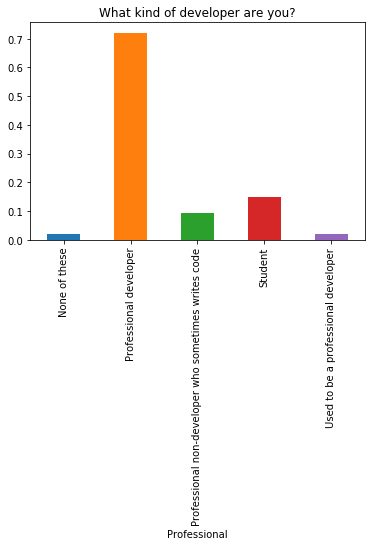

In [26]:
status_vals = df.groupby('Professional').size()#Provide a pandas series of the counts for each Professional status
# print(status_vals)
# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

(status_vals/df.shape[0]).plot(kind="bar");#绘制职业分布情况比例图。
plt.title("What kind of developer are you?");

### Question 5

**5.** 给出一个包含不同 **FormalEducation**（教育水平）及其相应人数的 Pandas Series。将这个 Series 存在 **ed_vals** 变量中。如果你回答正确，应该能看到一个关于教育分布情况的柱状图。

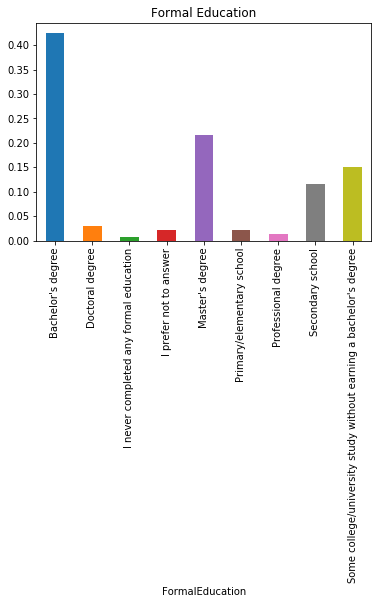

In [27]:
ed_vals = df.groupby('FormalEducation').size()#Provide a pandas series of the counts for each FormalEducation status

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(ed_vals/df.shape[0]).plot(kind="bar");
plt.title("Formal Education");

### Question 6

**6.** 给出一个包含不同 **Country**（国家）及其相应人数的 Pandas Series。将这个 Series 存储在 **count_vals** 变量中。如果你回答正确，应该能看到一个关于国家分布情况的柱状图。

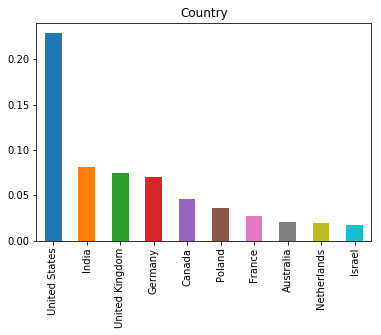

In [47]:
count_vals = df.loc[:,'Country'].value_counts()#Provide a pandas series of the counts for each Country

# The below should be a bar chart of the proportion of the top 10 countries for the
# individuals in your count_vals if it is set up correctly.

(count_vals[:10]/df.shape[0]).plot(kind="bar");#只查看前十个国家的比例分布情况
plt.title("Country");

你可以继续浏览数据集中的其他列来增加对数据的熟悉度。在本次课程中，你会一直都跟这个数据集打交道。

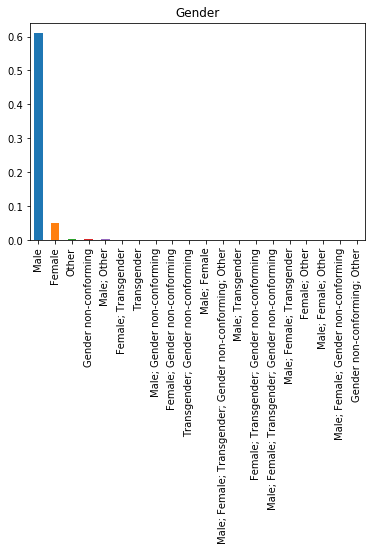

In [51]:
# 统计某一类列中值的出现次数有两种方法：
#使用groupby分组后统计，该方法得到的结果是按照原本数据中的值进行排序的。
# Gender_cals = df.groupby('Gender').size()
#使用value_counts()方法，得到的结果是按照次数来进行排序输出的（从大到小）。
Gender_cals = df.loc[:,'Gender'].value_counts()
(Gender_cals/df.shape[0]).plot(kind="bar");
plt.title("Gender");

In [46]:
df.loc[:,'Country'].value_counts()

United States                     4364
India                             1557
United Kingdom                    1424
Germany                           1337
Canada                             874
Poland                             694
France                             522
Australia                          399
Netherlands                        373
Israel                             338
Russian Federation                 330
Spain                              312
Italy                              304
Sweden                             267
Brazil                             259
Romania                            251
Switzerland                        242
Slovenia                           190
Austria                            190
Iran                               174
Czech Republic                     167
Pakistan                           160
Ukraine                            148
Turkey                             146
Belgium                            138
Ireland                  